<a href="https://colab.research.google.com/github/wilsonjefferson/APPLI_WARTSILA/blob/main/wartsila_pietro_morichetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA DESCRIPTION


In this section we are going to provide some useful plots over the datasets to better understand state-of-the-art.

### Speed Profile Dataset

vessels_speed_profile represents the percent of time that a vessel has sailed at a specific speed in a certain period (1 year).

In [2]:
url = r'https://raw.githubusercontent.com/wilsonjefferson/APPLI_WARTSILA/main/data/vessels_speed_profile.csv'
df_speed_prof = pd.read_csv(url, sep = ';')
df_speed_prof.head()

,imo,speed 0.0 - 0.5,speed 0.5 - 1.0,speed 1.0 - 1.5,speed 1.5 - 2.0,speed 2.0 - 2.5,speed 2.5 - 3.0,speed 3.0 - 3.5,speed 3.5 - 4.0,speed 4.0 - 4.5,speed 4.5 - 5.0,speed 5.0 - 5.5,speed 5.5 - 6.0,speed 6.0 - 6.5,speed 6.5 - 7.0,speed 7.0 - 7.5,speed 7.5 - 8.0,speed 8.0 - 8.5,speed 8.5 - 9.0,speed 9.0 - 9.5,speed 9.5 - 10.0,speed 10.0 - 10.5,speed 10.5 - 11.0,speed 11.0 - 11.5,speed 11.5 - 12.0,speed 12.0 - 12.5,speed 12.5 - 13.0,speed 13.0 - 13.5,speed 13.5 - 14.0,speed 14.0 - 14.5,speed 14.5 - 15.0,speed 15.0 - 15.5,speed 15.5 - 16.0,speed 16.0 - 16.5,speed 16.5 - 17.0,speed 17.0 - 17.5,speed 17.5 - 18.0,speed 18.0 - 18.5,speed 18.5 - 19.0,speed 19.0 - 19.5,speed 19.5 - 20.0,speed 20.0 - 20.5,speed 20.5 - 21.0,speed 21.0 - 21.5,speed 21.5 - 22.0,speed 22.0 - 22.5,speed 22.5 - 23.0,speed 23.0 - 23.5,speed 23.5 - 24.0,speed 24.0 - 24.5,speed 24.5 - 25.0,speed 25.0 - 25.5,speed 25.5 - 26.0,speed 26.0 - 26.5,speed 26.5 - 27.0,speed 27.0 - 27.5,speed 27.5 - 28.0,speed 28.0 - 28.5,speed 28.5 - 29.0,speed 29.0 - 29.5,speed 29.5 - 30.0,speed >30.0
0,6153496,0.9154,0.0108,0.0082,0.0061,0.0042,0.0032,0.0026,0.0016,0.0007,0.0013,0.0004,0.0005,0.0009,0.0007,0.0022,0.0022,0.0018,0.0037,0.0070,0.0125,0.0077,0.0055,0.0006,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
1,6153504,0.8087,0.0229,0.0256,0.0198,0.0120,0.0121,0.0117,0.0095,0.0046,0.0047,0.0028,0.0022,0.0022,0.0038,0.0027,0.0039,0.0053,0.0057,0.0058,0.0104,0.0157,0.0063,0.0013,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
2,6151611,0.3107,0.0020,0.0019,0.0026,0.0026,0.0031,0.0034,0.0036,0.0014,0.0034,0.0025,0.0029,0.0024,0.0020,0.0016,0.0022,0.0016,0.0031,0.0020,0.0026,0.0029,0.0046,0.0026,0.0016,0.0019,0.0020,0.0026,0.0034,0.0021,0.0022,0.0022,0.0026,0.0022,0.0029,0.0025,0.0044,0.0045,0.0083,0.0060,0.0086,0.0112,0.0092,0.0102,0.0167,0.0139,0.0402,0.0295,0.0670,0.0481,0.0341,0.0110,0.0435,0.0381,0.1144,0.0522,0.0279,0.005,0.0002,0.0,0.0,0.0
3,6151619,0.4217,0.0073,0.0046,0.0060,0.0057,0.0048,0.0057,0.0054,0.0046,0.0037,0.0046,0.0048,0.0049,0.0046,0.0046,0.0043,0.0060,0.0048,0.0040,0.0034,0.0045,0.0055,0.0049,0.0034,0.0048,0.0037,0.0028,0.0034,0.0027,0.0046,0.0028,0.0040,0.0033,0.0048,0.0046,0.0064,0.0070,0.0067,0.0163,0.0297,0.0255,0.0202,0.0271,0.0393,0.0412,0.0378,0.0382,0.0618,0.0516,0.0135,0.0007,0.0001,0.0001,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
4,6160131,0.3703,0.0040,0.0022,0.0022,0.0022,0.0033,0.0033,0.0031,0.0026,0.0040,0.0038,0.0060,0.0083,0.0101,0.0155,0.0181,0.0315,0.0440,0.0628,0.0623,0.0822,0.0745,0.0557,0.0408,0.0366,0.0232,0.0150,0.0064,0.0033,0.0015,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0


In [3]:
# simple lambda function to check if a belongs to [c,d]
contains = lambda speed_range, target : speed_range[0] <= target and target <= speed_range[1]

The following function is used to compute the cumuative percent of sailing time until the design speed

In [4]:
def cumulative_bounded_speed_profile(imo, design_speed = 0.0):
    if design_speed != 0.0:
      knots_range = [(knot, knot + 0.5) for knot in np.arange(0, 31, 0.5)]
      design_speed_range = [knots 
                              for knots in knots_range 
                                if contains(knots, design_speed)]

      design_speed_index = knots_range.index(design_speed_range[0])
      
      imo_column = 'imo' if not df_speed_prof.columns.get_loc('imo') else 'IMO'

      epl_time = np.sum(df_speed_prof[df_speed_prof[imo_column] == 
                                      imo].iloc[:, 1:design_speed_index].values)
    
    return [design_speed_index, epl_time]

The following function is used to plot the percent times for a given set of vessels. Percent times can be expressed in terms of distributive or cumulative representation.

In [5]:
def plot_speed_prof(imos, design_speed = 0.0, plot_type = "distributive", image_name = "image"):

  fig = plt.figure(figsize = (12,4))
  plt.xticks(rotation = 90)

  # take speed range column names and delete "speed" substring
  x = [range_speed.replace("speed", "") for range_speed in df_speed_prof.columns[1:]]    

  imo_column = 'imo' if not df_speed_prof.columns.get_loc('imo') else 'IMO'
  #fig = plt.figure()

  for imo in imos:

    # take %time for a give imo
    perc_times = df_speed_prof[df_speed_prof[imo_column] == imo].iloc[:, 1:]
    # set cumulative or no comulative target  for plot
    y = [np.cumsum(perc_times.values) if plot_type == "cumulative" else perc_times.values[0]][0]

    plt.plot(x, y, label = str(imo))  

  if len(imos) == 1 and design_speed  != 0.0 and plot_type == "cumulative":
    epl = cumulative_bounded_speed_profile(imos[0], design_speed)
    plt.axvline(x = epl[0], color='black', linestyle='-', linewidth = 3)
    plt.text(epl[0], epl[1], '%.2f'%epl[1], fontsize = 14)

  plt.title('Speed Vessel Profile')
  plt.xlabel('Speed')
  plt.ylabel('%Time')
  plt.legend(loc='upper right');
  
  plt.grid()
  fig.savefig('{}.png'.format(image_name), bbox_inches='tight')
  plt.show()

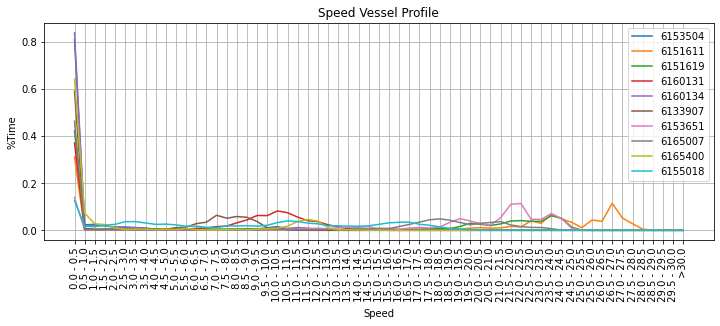

In [6]:
plot_speed_prof(df_speed_prof["imo"].loc[1:10], design_speed = 6.70, plot_type = "distributive", image_name = "distributive_plot")

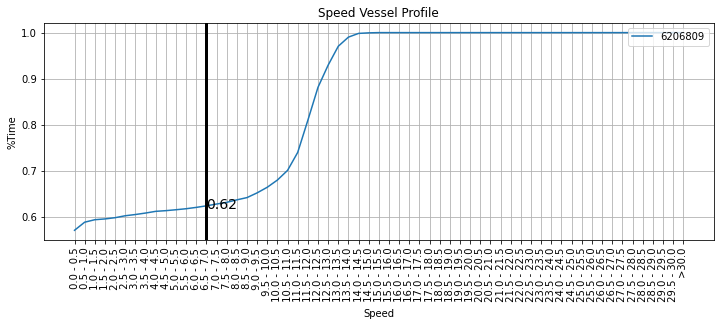

In [7]:
plot_speed_prof([6206809], design_speed = 6.70, plot_type = "cumulative", image_name = "cumulative_plot")

### Design Speed Dataset

vessels_design_speeds represents the theoretical speeds for which vessels are designed.

In [8]:
url = r'https://raw.githubusercontent.com/wilsonjefferson/APPLI_WARTSILA/main/data/vessels_design_speeds.csv'
df_design_speed = pd.read_csv(url, sep = ';')

print("design speed, check for NaN:", df_design_speed.isna().values.any())
df_design_speed.head()

design speed, check for NaN: False


,IMO,Design Speed (knots)
0,6153496,5.60
1,6153504,6.70
2,6151611,31.25
3,6151619,31.25
4,6160131,14.20


The following piece of code is used to show how vessels are scattered according their design speed. 
In the scatter plot, vessels are represented as blue points; while in the density plot we have the same representation through a density curve.

It is clear that most of the vessels have a design speed in the range 10 - 15 knots.

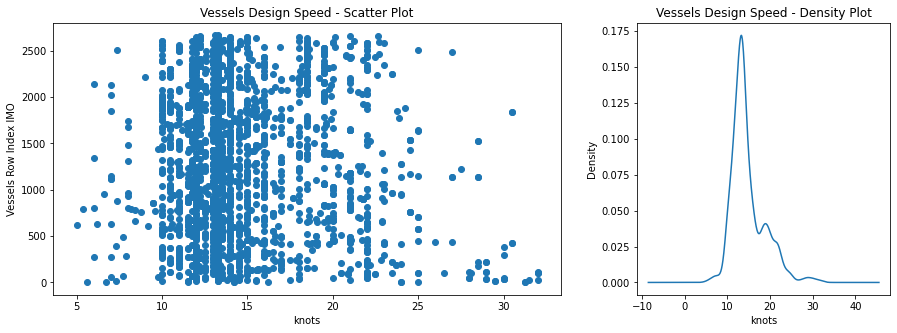

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), 
                               gridspec_kw={
                           'width_ratios': [2, 1],
                           'height_ratios': [1]})

# scatter plot
ax1.plot(df_design_speed["Design Speed (knots)"], np.arange(0, df_design_speed.shape[0]), 'o')
ax1.set_title('Vessels Design Speed - Scatter Plot')
ax1.set(xlabel = 'knots', ylabel = 'Vessels Row Index IMO')

# density plot
df_design_speed["Design Speed (knots)"].plot.density()
ax2.set_title('Vessels Design Speed - Density Plot')
ax2.set(xlabel = 'knots')

fig.savefig('design_speed.png', bbox_inches = 'tight')
fig.show()

### Vessels Info Dataset (Info)

vessels_info represents general information for each vessel.

In [10]:
url = r'https://raw.githubusercontent.com/wilsonjefferson/APPLI_WARTSILA/main/data/vessels_info.xlsx'
df_info = pd.read_excel(url)

print("info, check for NaN:", df_info.isna().values.any())
print("count NaN:", df_info.isna().values.sum())

df_info.head()

info, check for NaN: True
count NaN: 27


,Inst IMO No,Main Engine Power (kW),Count Inst,Count Equip,Customer ID,Customer Country,Cust Corp Group Key,CustStatus,Inst Status,Inst Category,Inst Load attribute,Inst Segment,Inst Cluster,InstGroup,Inst Type,Inst Type Id,Inst Class Society,Inst Operator Id,Inst Builder Id,Inst Registration Country,Inst Operation Country,Inst BuiltDate,Inst CommDate,Inst Estimated Date,Inst Estimated Date Flag,Equip Status,Equip Category Name,Equip ProdRefTypeID,Equip Application,Equip FuelType,Equip FuelQuality,Equip CommDate,Equip CylQty,Equip Eng L V,Equip bore in mm,Equip Engine rotation,Equip Drive,Equip Version,Equip Product DIA,Equip Position,Equip Valid from,Business,Business Line,Product Category,Product Portfolio,Product
0,6153496,3939.94,1,2,52560,FI,,,Operating,Marine,-,Special Vessels,Service Vessels,Tugs,Pusher Tug,M632,DNVG,59130,20057,FI,FI,2002-07-15,2002-07-15 00:00:00,2002-07-15 00:00:00,Act,Operating,Engines (E),Engine 14,ME,LFO,,37452,6,R,369.0,CW,CPP,,0,-,2004-01-16 00:00:00,Power Systems,Power Supply,Medium Bore Engines,Power Supply,Vasa 32
1,6153504,3939.94,1,2,52560,FI,,,Operating,Marine,-,Special Vessels,Service Vessels,Tugs,Pusher Tug,M632,DNVG,59130,20057,FI,FI,2002-10-10,2002-10-10 00:00:00,2002-10-10 00:00:00,Act,Operating,Engines (E),Engine 14,ME,LFO,,37539,6,R,369.0,CW,CPP,,0,-,2004-01-16 00:00:00,Power Systems,Power Supply,Medium Bore Engines,Power Supply,Vasa 32
2,6151611,38438.44,1,4,940,GR,8342,,Operating,Marine,-,Cruise & Ferry,Passenger & Cargo Vessels,Passenger & Cargo Vessels,Passenger & Cargo Vessel,M208,ABS,1058,2397,GR,GR,2002-07-10,2002-07-11 00:00:00,2002-07-11 00:00:00,Act,Operating,Engines (E),Engine 6,ME,HFO,HFO 380,37104,12,V,531.0,"CW,CCW",CPP,,0,-,2004-01-16 00:00:00,Power Systems,Power Supply,Large Bore Engines,Power Supply,W 46
3,6151619,38438.44,1,4,8787,IT,18942,,Operating,Marine,-,Cruise & Ferry,Passenger & Cargo Vessels,Passenger & Cargo Vessels,Passenger & Cargo Vessel,M208,ABS,9885,2397,IT,IT,2002-10-02,2002-05-15 00:00:00,2002-05-15 00:00:00,Act,Operating,Engines (E),Engine 6,ME,HFO,HFO 380,37226,12,V,531.0,"CW,CCW",CPP,,0,-,2004-01-16 00:00:00,Power Systems,Power Supply,Large Bore Engines,Power Supply,W 46
4,6160131,3603.60,1,2,961,FR,,,Operating,Marine,-,Merchant,Tankers,Product Tankers,Product Tanker,M143,BV,1082,64784,FR,GF,2001-12-05,2001-11-16 00:00:00,2001-11-16 00:00:00,Act,Operating,Engines (E),Engine 14,ME,HFO,HFO 730,37211,6,R,369.0,"CW,CCW",CPP,,0,-,2004-01-16 00:00:00,Power Systems,Power Supply,Medium Bore Engines,Power Supply,Vasa 32


Since this dataset has several NaN, it is reasonable to check which columns these NaN belongs to.

As we can see below, these NaN belong to no relevant columns, then we can just ignore them and go on with the analysis.

In [11]:
for header in df_info.columns:
  if df_info[header].isna().values.any() == True:
    print(header)

Customer Country
Inst Registration Country
Inst Operation Country
Equip bore in mm


As useful information we may show a pie chart plot to represent from which country belong the customers.

Plot shows that most of the customers belong to Norway, Russia and Netherlands.



In [12]:
# percent of customers for each country
perc_cust_ctr = df_info["Customer Country"].value_counts(normalize = True)*100

# percent less than 3.0% are ignored (they will be reduced in one sigle label)
country_dict = {perc_cust_ctr.index[idx] : perc_cust_ctr[idx] 
  for idx in range(0, len(perc_cust_ctr.index)) 
    if perc_cust_ctr[idx] >= 3.0}

# customers belong to a country with a percetange very low (< 3.0%)
country_dict["Other"] = 100 - sum(list(country_dict.values()))

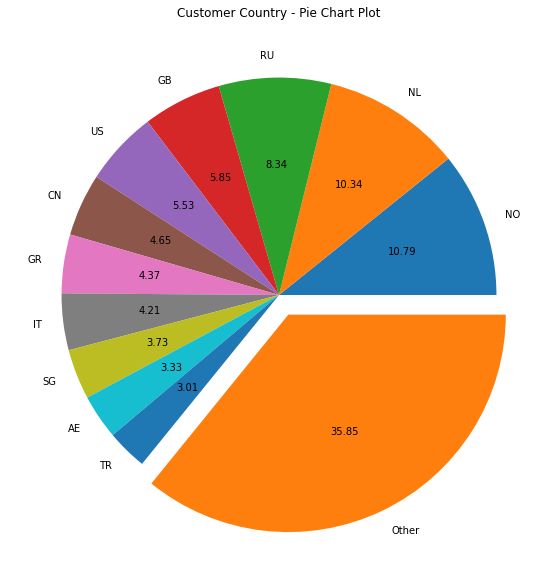

In [13]:
# pie chart plot
fig = plt.figure(figsize = (10, 10))
explode_ = tuple([0.1 if key == "Other" else 0 for key in country_dict.keys()])
plt.pie(country_dict.values(), labels = country_dict.keys(), autopct = "%.2f", explode = explode_)
plt.title("Customer Country - Pie Chart Plot")

fig.savefig('customer_percentage.png', bbox_inches = 'tight')
plt.show()

## DATA PRE-PROCESSING

In this section we are going to execute a sequence of filtering procedures to respect the constraints.

Since datasets has the same primary key (imo) we should rename its column, for each, so that it can refer to the same column.

We can also rename some columns for a better manipulation of the dataframes.

In [14]:
df_speed_prof.rename(columns = {"imo" : "IMO"}, inplace = True)

for column in list(df_speed_prof.columns.values)[1:]:
  renamed_column = column.replace("speed ", "")
  df_speed_prof.rename(columns = {column : renamed_column}, inplace = True)

df_speed_prof.head()

,IMO,0.0 - 0.5,0.5 - 1.0,1.0 - 1.5,1.5 - 2.0,2.0 - 2.5,2.5 - 3.0,3.0 - 3.5,3.5 - 4.0,4.0 - 4.5,4.5 - 5.0,5.0 - 5.5,5.5 - 6.0,6.0 - 6.5,6.5 - 7.0,7.0 - 7.5,7.5 - 8.0,8.0 - 8.5,8.5 - 9.0,9.0 - 9.5,9.5 - 10.0,10.0 - 10.5,10.5 - 11.0,11.0 - 11.5,11.5 - 12.0,12.0 - 12.5,12.5 - 13.0,13.0 - 13.5,13.5 - 14.0,14.0 - 14.5,14.5 - 15.0,15.0 - 15.5,15.5 - 16.0,16.0 - 16.5,16.5 - 17.0,17.0 - 17.5,17.5 - 18.0,18.0 - 18.5,18.5 - 19.0,19.0 - 19.5,19.5 - 20.0,20.0 - 20.5,20.5 - 21.0,21.0 - 21.5,21.5 - 22.0,22.0 - 22.5,22.5 - 23.0,23.0 - 23.5,23.5 - 24.0,24.0 - 24.5,24.5 - 25.0,25.0 - 25.5,25.5 - 26.0,26.0 - 26.5,26.5 - 27.0,27.0 - 27.5,27.5 - 28.0,28.0 - 28.5,28.5 - 29.0,29.0 - 29.5,29.5 - 30.0,>30.0
0,6153496,0.9154,0.0108,0.0082,0.0061,0.0042,0.0032,0.0026,0.0016,0.0007,0.0013,0.0004,0.0005,0.0009,0.0007,0.0022,0.0022,0.0018,0.0037,0.0070,0.0125,0.0077,0.0055,0.0006,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
1,6153504,0.8087,0.0229,0.0256,0.0198,0.0120,0.0121,0.0117,0.0095,0.0046,0.0047,0.0028,0.0022,0.0022,0.0038,0.0027,0.0039,0.0053,0.0057,0.0058,0.0104,0.0157,0.0063,0.0013,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
2,6151611,0.3107,0.0020,0.0019,0.0026,0.0026,0.0031,0.0034,0.0036,0.0014,0.0034,0.0025,0.0029,0.0024,0.0020,0.0016,0.0022,0.0016,0.0031,0.0020,0.0026,0.0029,0.0046,0.0026,0.0016,0.0019,0.0020,0.0026,0.0034,0.0021,0.0022,0.0022,0.0026,0.0022,0.0029,0.0025,0.0044,0.0045,0.0083,0.0060,0.0086,0.0112,0.0092,0.0102,0.0167,0.0139,0.0402,0.0295,0.0670,0.0481,0.0341,0.0110,0.0435,0.0381,0.1144,0.0522,0.0279,0.005,0.0002,0.0,0.0,0.0
3,6151619,0.4217,0.0073,0.0046,0.0060,0.0057,0.0048,0.0057,0.0054,0.0046,0.0037,0.0046,0.0048,0.0049,0.0046,0.0046,0.0043,0.0060,0.0048,0.0040,0.0034,0.0045,0.0055,0.0049,0.0034,0.0048,0.0037,0.0028,0.0034,0.0027,0.0046,0.0028,0.0040,0.0033,0.0048,0.0046,0.0064,0.0070,0.0067,0.0163,0.0297,0.0255,0.0202,0.0271,0.0393,0.0412,0.0378,0.0382,0.0618,0.0516,0.0135,0.0007,0.0001,0.0001,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
4,6160131,0.3703,0.0040,0.0022,0.0022,0.0022,0.0033,0.0033,0.0031,0.0026,0.0040,0.0038,0.0060,0.0083,0.0101,0.0155,0.0181,0.0315,0.0440,0.0628,0.0623,0.0822,0.0745,0.0557,0.0408,0.0366,0.0232,0.0150,0.0064,0.0033,0.0015,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0


In [15]:
df_design_speed.rename(columns = {"Design Speed (knots)" : "DS"}, inplace = True)

design speed dataset is a dataframe composed by just one column, we can merge it with the vessels profile dataset.

In [16]:
df_speed_prof_merged = df_design_speed.merge(df_speed_prof, how = "inner", on = "IMO")
df_speed_prof_merged.head()

,IMO,DS,0.0 - 0.5,0.5 - 1.0,1.0 - 1.5,1.5 - 2.0,2.0 - 2.5,2.5 - 3.0,3.0 - 3.5,3.5 - 4.0,4.0 - 4.5,4.5 - 5.0,5.0 - 5.5,5.5 - 6.0,6.0 - 6.5,6.5 - 7.0,7.0 - 7.5,7.5 - 8.0,8.0 - 8.5,8.5 - 9.0,9.0 - 9.5,9.5 - 10.0,10.0 - 10.5,10.5 - 11.0,11.0 - 11.5,11.5 - 12.0,12.0 - 12.5,12.5 - 13.0,13.0 - 13.5,13.5 - 14.0,14.0 - 14.5,14.5 - 15.0,15.0 - 15.5,15.5 - 16.0,16.0 - 16.5,16.5 - 17.0,17.0 - 17.5,17.5 - 18.0,18.0 - 18.5,18.5 - 19.0,19.0 - 19.5,19.5 - 20.0,20.0 - 20.5,20.5 - 21.0,21.0 - 21.5,21.5 - 22.0,22.0 - 22.5,22.5 - 23.0,23.0 - 23.5,23.5 - 24.0,24.0 - 24.5,24.5 - 25.0,25.0 - 25.5,25.5 - 26.0,26.0 - 26.5,26.5 - 27.0,27.0 - 27.5,27.5 - 28.0,28.0 - 28.5,28.5 - 29.0,29.0 - 29.5,29.5 - 30.0,>30.0
0,6153496,5.60,0.9154,0.0108,0.0082,0.0061,0.0042,0.0032,0.0026,0.0016,0.0007,0.0013,0.0004,0.0005,0.0009,0.0007,0.0022,0.0022,0.0018,0.0037,0.0070,0.0125,0.0077,0.0055,0.0006,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
1,6153504,6.70,0.8087,0.0229,0.0256,0.0198,0.0120,0.0121,0.0117,0.0095,0.0046,0.0047,0.0028,0.0022,0.0022,0.0038,0.0027,0.0039,0.0053,0.0057,0.0058,0.0104,0.0157,0.0063,0.0013,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
2,6151611,31.25,0.3107,0.0020,0.0019,0.0026,0.0026,0.0031,0.0034,0.0036,0.0014,0.0034,0.0025,0.0029,0.0024,0.0020,0.0016,0.0022,0.0016,0.0031,0.0020,0.0026,0.0029,0.0046,0.0026,0.0016,0.0019,0.0020,0.0026,0.0034,0.0021,0.0022,0.0022,0.0026,0.0022,0.0029,0.0025,0.0044,0.0045,0.0083,0.0060,0.0086,0.0112,0.0092,0.0102,0.0167,0.0139,0.0402,0.0295,0.0670,0.0481,0.0341,0.0110,0.0435,0.0381,0.1144,0.0522,0.0279,0.005,0.0002,0.0,0.0,0.0
3,6151619,31.25,0.4217,0.0073,0.0046,0.0060,0.0057,0.0048,0.0057,0.0054,0.0046,0.0037,0.0046,0.0048,0.0049,0.0046,0.0046,0.0043,0.0060,0.0048,0.0040,0.0034,0.0045,0.0055,0.0049,0.0034,0.0048,0.0037,0.0028,0.0034,0.0027,0.0046,0.0028,0.0040,0.0033,0.0048,0.0046,0.0064,0.0070,0.0067,0.0163,0.0297,0.0255,0.0202,0.0271,0.0393,0.0412,0.0378,0.0382,0.0618,0.0516,0.0135,0.0007,0.0001,0.0001,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0
4,6160131,14.20,0.3703,0.0040,0.0022,0.0022,0.0022,0.0033,0.0033,0.0031,0.0026,0.0040,0.0038,0.0060,0.0083,0.0101,0.0155,0.0181,0.0315,0.0440,0.0628,0.0623,0.0822,0.0745,0.0557,0.0408,0.0366,0.0232,0.0150,0.0064,0.0033,0.0015,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0


One of the constraints is related with the "sailing time" of a vessel, defined as the time spent at speeds higher than 3 knots.
So, we need to drop some columns from the speed profile dataset.

#### Drop columns refering to 0.0 - 3.0 knots range

In [17]:
df_speed_prof_merged.drop(df_speed_prof_merged.columns[[2, 3, 4, 5, 6, 7]], axis = 1, inplace = True)

At this point we have a knots range starting from 3  up to more than 30 knots. Since we have dropped part of the sailing percent time, we need to recompute the percentages relative to the remaining set of columns.

In [ ]:
df_speed_prof_merged.iloc[:, 2:] = df_speed_prof_merged.iloc[:, 2:].div(df_speed_prof_merged.iloc[:, 2:].sum(axis = 1), axis = 0)

In [19]:
#np.cumsum(df_speed_prof_merged.iloc[:, 2:], axis = 1) # check cumulation

Another constraint is to consider just a specific subset of columns for the vessels info dataset, we can filter them direclty during the importing phase.
Columns are renamed according the previous consideration.

#### Filtering columns for feasible ones

In [20]:
feasible_header = ['Inst IMO No', 'Main Engine Power (kW)', 'Customer ID',
                   'Inst Cluster', 'Inst Segment','Inst BuiltDate', 'Product']

df_info_imp = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Wartsila/data/vessels_info.xlsx', usecols = feasible_header)
df_info_imp.rename(columns = {"Inst IMO No":"IMO", "Main Engine Power (kW)" : "EP"}, inplace = True)
df_info_imp.head()

,IMO,EP,Customer ID,Inst Segment,Inst Cluster,Inst BuiltDate,Product
0,6153496,3939.94,52560,Special Vessels,Service Vessels,2002-07-15,Vasa 32
1,6153504,3939.94,52560,Special Vessels,Service Vessels,2002-10-10,Vasa 32
2,6151611,38438.44,940,Cruise & Ferry,Passenger & Cargo Vessels,2002-07-10,W 46
3,6151619,38438.44,8787,Cruise & Ferry,Passenger & Cargo Vessels,2002-10-02,W 46
4,6160131,3603.60,961,Merchant,Tankers,2001-12-05,Vasa 32


Another filtering constraint is to consider vessels that are builted after 2005, and focusing on a specific set of type of vessels.

#### Filtering Info to show vessels built after 2005 ordering by datetime

In [21]:
target_time_str = '2005-01-01'
df_info_imp = df_info_imp[df_info_imp['Inst BuiltDate'] > pd.to_datetime(target_time_str)] # filter rows according date target
df_info_imp = df_info_imp.sort_values(by = ['Inst BuiltDate']) # sort for readability

#### Filtering Info to show a specific type of vessels 

In [22]:
feasible_ships = ['Cruise Vessels', 'ferries', 'Tankers', 'Gas Tankers', 
                  'Container Vessels', 'Bulk Carriers']
df_info_imp = df_info_imp[df_info_imp['Inst Cluster'].isin(feasible_ships)]

Good, we have manipulated the datasets, but they still are "individual" dataset: let's merge them together to have one single dataframe.

In [23]:
merged_data = df_info_imp.merge(df_speed_prof_merged, how = "inner", on = "IMO")

## TASK RESOLUTION

In this section we are going to provide the solution for the given task.

In [24]:
merged_data.head()

,IMO,EP,Customer ID,Inst Segment,Inst Cluster,Inst BuiltDate,Product,DS,3.0 - 3.5,3.5 - 4.0,4.0 - 4.5,4.5 - 5.0,5.0 - 5.5,5.5 - 6.0,6.0 - 6.5,6.5 - 7.0,7.0 - 7.5,7.5 - 8.0,8.0 - 8.5,8.5 - 9.0,9.0 - 9.5,9.5 - 10.0,10.0 - 10.5,10.5 - 11.0,11.0 - 11.5,11.5 - 12.0,12.0 - 12.5,12.5 - 13.0,13.0 - 13.5,13.5 - 14.0,14.0 - 14.5,14.5 - 15.0,15.0 - 15.5,15.5 - 16.0,16.0 - 16.5,16.5 - 17.0,17.0 - 17.5,17.5 - 18.0,18.0 - 18.5,18.5 - 19.0,19.0 - 19.5,19.5 - 20.0,20.0 - 20.5,20.5 - 21.0,21.0 - 21.5,21.5 - 22.0,22.0 - 22.5,22.5 - 23.0,23.0 - 23.5,23.5 - 24.0,24.0 - 24.5,24.5 - 25.0,25.0 - 25.5,25.5 - 26.0,26.0 - 26.5,26.5 - 27.0,27.0 - 27.5,27.5 - 28.0,28.0 - 28.5,28.5 - 29.0,29.0 - 29.5,29.5 - 30.0,>30.0
0,6206809,2306.31,52698,Merchant,Tankers,2005-01-10,W 32,13.450000,0.006779,0.008034,0.009289,0.003766,0.005021,0.005523,0.007281,0.008536,0.009792,0.009289,0.013558,0.012302,0.025860,0.030630,0.039418,0.052724,0.098167,0.175496,0.180015,0.121014,0.103189,0.049711,0.020336,0.003013,0.001255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6225665,9289.29,19647,Merchant,Bulk Carriers,2005-02-01,W 38,13.079892,0.007740,0.020124,0.007740,0.004644,0.007740,0.024768,0.012384,0.012384,0.012384,0.029412,0.012384,0.049536,0.046440,0.034056,0.017028,0.024768,0.029412,0.034056,0.037152,0.017028,0.020124,0.029412,0.029412,0.049536,0.058824,0.041796,0.041796,0.041796,0.024768,0.041796,0.058824,0.071207,0.037152,0.012384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6222385,1793.79,1267,Merchant,Tankers,2005-02-01,W 20,11.500000,0.023251,0.036569,0.063431,0.107675,0.186682,0.204515,0.195260,0.081941,0.032957,0.018510,0.031377,0.013770,0.002257,0.000000,0.000451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000451,0.000000,0.000451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6178373,6726.73,52560,Merchant,Tankers,2005-02-04,W 46,14.000000,0.006186,0.003991,0.004989,0.003592,0.002594,0.005787,0.004989,0.002395,0.005987,0.011974,0.014768,0.013570,0.017162,0.026941,0.024746,0.034524,0.053283,0.107763,0.184993,0.179206,0.097186,0.046498,0.034524,0.020954,0.023149,0.033526,0.020954,0.006985,0.005787,0.000998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6151271,50738.74,1679,Cruise & Ferry,Cruise Vessels,2005-03-24,Sulzer Z 40,20.987103,0.002692,0.002937,0.002325,0.002080,0.002447,0.002937,0.002080,0.002692,0.002325,0.003182,0.002447,0.003549,0.003916,0.008933,0.011258,0.013950,0.020803,0.020803,0.036221,0.032428,0.047479,0.059594,0.060328,0.044909,0.030225,0.031694,0.021047,0.024963,0.034753,0.038302,0.057513,0.074156,0.064733,0.056167,0.033162,0.042217,0.034386,0.034386,0.021047,0.007097,0.001836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Support Functions

Since the profile speed had as columns the knots range, we may consider the following lambda function to extract the knots range (from string to list of floats).

In [25]:
# lamba function to convert knots string range to list of float knots
convert_to_real = lambda range : [float(knot) for knot in range.split(' - ')]

From the document it is not clear if the "Main Engine Power" column is already composed by engine power at 85%. 
We suppose we should compute this percent, and it is done by using the following lambda function.

In [26]:
# lambda function to compute the precentage for a value
percent = lambda value, perc : value * perc / 100

Since the vessels speed profile dataset doesn't consider range of knots (so we not have a "continuous" measurement), we cannot provide an exact max operational speed. 

So, we will consider the mean of the knots range taht includes the max op speed as its approximation. While for max op speed that is greater than 30 knots, we consider 31 as approximation.

This assumption is implemented by the following function.

In [27]:
def convert_to_range(knots):
  if knots != '>30.0':
    knots_range = [float(knot) for knot in knots.split(' - ')]
    return np.mean(knots_range)
  else:
    return 31 # by default

### Cumulate up to 95% of Sailing Time

To obtain the max operational speed, we need to cumulate the percent sailing time until we reach at least 95% as cumulative value, at a certain knots range. This specific knots range is the knots range of interest for us and that we will use to approximate the max operation speed.

This is done by the following funtion.

In [28]:
def cumulative_95_sailing_time(imo):
    knots_95 = '' # knots range where we achive 95% of sailing time
    cumulative_sum = 0.0 # cumulative sum until 95% of sailing time

    # row index in dataframe corresponding to the given vessel (IMO)
    row_idx = merged_data.index[merged_data['IMO'] == imo].tolist()[0]

    # start by 8, index of the first feasible knots range in the dataframe
    for column_idx in range(8, merged_data.shape[1]):
      cumulative_sum += merged_data.iat[row_idx, column_idx]
      if cumulative_sum >= .95 and not knots_95:
        knots_95 += list(df_speed_prof.columns.values)[column_idx]
        break
    
    # this vessel doesn't reach 95%, so we set a default knots range
    if not knots_95:
      knots_95 += merged_data.columns.values[-1] # '>30.0'

    return [knots_95, cumulative_sum]

cumulative_95_sailing_time(6206809) # test

['14.0 - 14.5', 0.9753954305799649]

Similar to the previous function, now we are interest to understand what is the cumulative percent of sailing time until the design spped for a certain vessel. So, given the vessel ID (imo) and its design speed, we compute the corrisponding (cumulative) sailing percent time.

This is done by the following function.

### Cumulate Sailing Time up to Design Speed

In [29]:
def cumulative_design_speed(imo):
  knots_design_speed = '' # knots range where we achive 95% of sailing time
  cumulative_sum = 0.0 # cumulative sum until 95% of sailing time

  row_idx = merged_data.index[merged_data['IMO'] == imo].tolist()[0]
  design_speed = merged_data.at[row_idx, 'DS']

  for column_idx in range(8, merged_data.shape[1]):
    cumulative_sum += merged_data.iat[row_idx, column_idx]
    knots_range = convert_to_real(merged_data.columns[column_idx])
    if contains(knots_range, design_speed):
      knots_design_speed += merged_data.columns[column_idx]
      break

  return [knots_design_speed, round(cumulative_sum, 2)]

cumulative_design_speed(6206809) # test

['13.0 - 13.5', 0.93]

### Main Part of the Script

At this point we are able to find all the parameters need to compute the real propusion power, and then calculate the EPL Potential.

In [30]:
def propulsion_power(design_speed, engine_85, max_op_speed):
  return ((max_op_speed / design_speed) ** 3) * engine_85

The following piece of code could be considered as the main function for this section. Here, we are going to evaluate the EPL Potential for all the vessels satisfying the constraints of the task.

In [31]:
addressable_imo = []
addressable_max_op = []
addressable_design_speed = []
addressable_prop_power = []
addressable_epl_potential = []
addressable_epl_percent = []

for imo in merged_data["IMO"]:

  engine = merged_data[merged_data["IMO"] == imo]["EP"].values[0] # engine power
  engine_85 = round(percent(engine, 85), 2) # 85% engine power

  design_speed = merged_data[merged_data["IMO"] == imo]["DS"].values[0] # design speed
  sailing_design_speed = cumulative_design_speed(imo) # salinig time at design speed

  max_op_speed = cumulative_95_sailing_time(imo)[0] # max operational speed
  max_op_speed = convert_to_range(max_op_speed)

  #print(imo, engine_85, sailing_design_speed, max_op_speed)

  # if a certain vessel has a design speed greater than its max op speed
  # than we can consider it to compute the EPL
  if design_speed > max_op_speed:
    prop_power = propulsion_power(design_speed, engine_85, max_op_speed)
    epl = engine - (prop_power / 0.85)
    epl_perc = epl / engine

    addressable_imo.append(imo)
    addressable_max_op.append(max_op_speed)
    addressable_design_speed.append(design_speed)
    addressable_prop_power.append(prop_power)
    addressable_epl_potential.append(epl)
    addressable_epl_percent.append(epl_perc)

In [32]:
# gather lists in a dataframe
addressable_dict = {'IMO' : addressable_imo,
                    'Design Speed' : addressable_design_speed,
                    'Max Op Speed' : addressable_max_op,
                    'Real Prop Power' : addressable_prop_power,
                    'EPL Potential' : addressable_epl_potential,
                    'EPL Percent' : addressable_epl_percent}

df_addr = pd.DataFrame (addressable_dict, 
                        columns = ['IMO', 'Design Speed','Max Op Speed', 
                                   'Real Prop Power', 'EPL Potential', 'EPL Percent'])

print(df_addr.shape)
df_addr

(325, 6)


,IMO,Design Speed,Max Op Speed,Real Prop Power,EPL Potential,EPL Percent
0,6222385,11.5,8.25,562.935221,1131.513270,0.630795
1,6200553,14.5,14.25,3992.756600,251.589294,0.050837
2,6201495,18.5,18.25,6037.940821,295.940210,0.039995
3,6228438,11.5,9.75,929.202614,700.610454,0.390576
4,6200233,10.0,8.25,710.918087,653.115780,0.438483
...,...,...,...,...,...,...
320,6500483,19.5,19.25,42138.621604,1956.681054,0.037971
321,6336763,12.0,10.25,610.848757,434.504403,0.376798
322,6527475,19.5,18.75,18879.820138,2773.426896,0.111004
323,6513237,16.9,14.75,5294.744613,3140.258691,0.335162


Last thing to do is filter this new dataframe to obtain the vessels with reduction of the main engine power at least of 10%. Then, merge it with the filtered version of the vessels info dataset.

The following dataset shows a view of the market study on EPL.

In [33]:
df_addr = df_addr[df_addr['EPL Percent'] >= .1]
df_epl = df_info_imp.merge(df_addr, how = 'inner', on = 'IMO')

df_epl.sort_values(by = ['IMO', 'EPL Percent'], inplace = True) # sort
print(df_epl.shape)
df_epl.head()

(226, 12)


,IMO,EP,Customer ID,Inst Segment,Inst Cluster,Inst BuiltDate,Product,Design Speed,Max Op Speed,Real Prop Power,EPL Potential,EPL Percent
5,6139481,40360.36,1074,Cruise & Ferry,Cruise Vessels,2005-06-06,W 46,22.200000,18.25,19059.157138,17937.822191,0.444442
16,6153410,41513.51,1050,Cruise & Ferry,Cruise Vessels,2006-01-31,Sulzer Z 40,20.987103,20.25,31697.568624,4222.252795,0.101708
9,6185454,60540.54,1158,Cruise & Ferry,Cruise Vessels,2005-07-15,W 46,23.000000,18.75,27879.535433,27741.086549,0.458223
113,6195697,3203.20,25567,Merchant,Tankers,2010-06-04,W 32,13.700000,12.25,1946.478209,913.225636,0.285098
2,6200233,1489.49,2856,Merchant,Tankers,2005-05-05,W 20,10.000000,8.25,710.918087,653.115780,0.438483


In [34]:
df_epl.describe()

,IMO,EP,Customer ID,Design Speed,Max Op Speed,Real Prop Power,EPL Potential,EPL Percent
count,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,6.335508e+06,12360.954956,41721.637168,15.101303,13.305310,7867.346926,3105.252690,0.310048
std,1.068646e+05,16657.860118,81402.536224,4.061961,4.059041,11199.459166,4641.470433,0.162260
min,6.139481e+06,960.960000,745.000000,9.500000,5.750000,241.113249,138.673914,0.101043
25%,6.238740e+06,1921.920000,2912.000000,12.219540,9.750000,1083.131429,615.134688,0.190917
50%,6.298201e+06,2696.695000,25567.000000,13.600000,12.000000,1708.272378,1015.475719,0.270440
75%,6.426923e+06,20288.287500,45751.250000,18.621875,17.250000,11889.945903,3640.120668,0.409790
max,6.552713e+06,77693.690000,411454.000000,24.210000,22.750000,58246.140689,27741.086549,0.887023
